In [3]:
import pandas as pd
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from avoidance2 import functions, config
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)


In [19]:
all_feat = pd.read_csv('/home/bikash/Documents/manscr/Pubs_man/results/features_and_merged_with_ixnos_dicodone.csv')

In [4]:
all_feat.columns

Index(['Accession', 'Sequence', 'Class', 'Label', 'analyze', 'CAI', 'tAI',
       'G+C (%)', 'STR(-30:30)', 'Avoidance_unparsed', 'Accessibility',
       'Avd_parsed_dg_int', 'Avoidance(Min_dg_int)', 'iXnos', 'Genome'],
      dtype='object')

In [32]:
all_feat=all_feat.rename(columns = {'Avoidance(Min_dg_int)':'Avoidance', 'Genome':'Codon pair', 'STR(-30:30)':'RNA folding'})

In [33]:
features = ['CAI', 'tAI', 'G+C (%)', 'iXnos', 'Codon pair', 'RNA folding','Avoidance','Accessibility']

In [34]:
X = all_feat[features].values
y = all_feat['Label'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                            test_size=0.2, \
                                            random_state=12345)

In [36]:
clf = RandomForestClassifier(n_estimators=50, \
                                  random_state=12345)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
imp_feat = [features[i] for i in np.argsort(clf.feature_importances_)]
feat_gini_sorted = np.round(np.sort(clf.feature_importances_), 4)

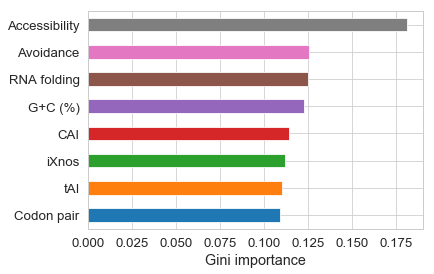

In [42]:
feat_importances = pd.Series(clf.feature_importances_, index=features)
ax = feat_importances.nsmallest(20).plot(kind='barh')
ax.set(xlabel='Gini importance')
plt.savefig("gini_features.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()